In [15]:
import kagglehub
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

In [4]:
data_path = kagglehub.dataset_download("mragpavank/heart-diseaseuci")

100%|██████████| 3.40k/3.40k [00:00<00:00, 2.71MB/s]

Extracting files...


In [5]:
downloaded_file = os.path.join(data_path, "heart.csv")
downloaded_file

'/root/.cache/kagglehub/datasets/mragpavank/heart-diseaseuci/versions/1/heart.csv'

In [6]:
df = pd.read_csv(downloaded_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
X = df.drop(columns=["target"])
y = df["target"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

In [25]:
metrics = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None  # Probability scores


    metrics[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

In [29]:
accuracy_df

,Accuracy
Logistic Regression,0.852459
Random Forest,0.819672
SVM,0.836066
KNN,0.819672
Naive Bayes,0.852459


<ipython-input-26-f7f741697977>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], palette="viridis")


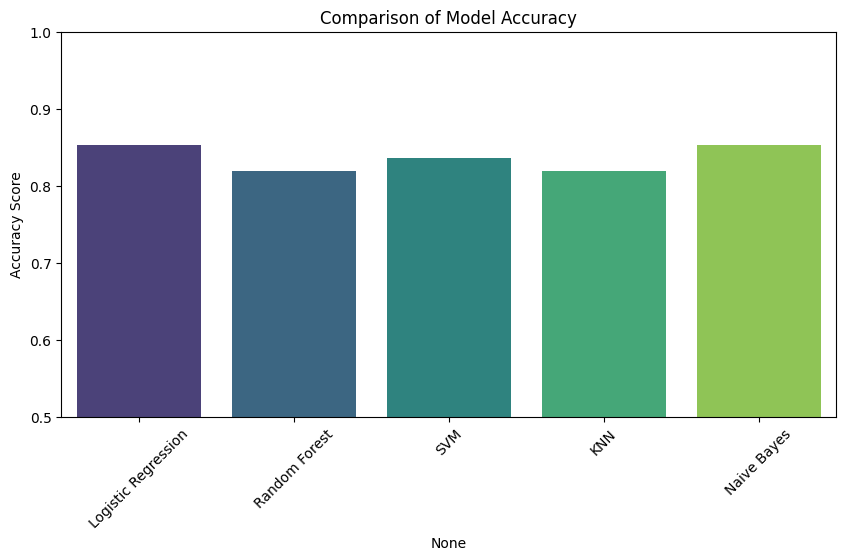

In [26]:
accuracy_df = pd.DataFrame.from_dict(metrics, orient="index")[["Accuracy"]]


plt.figure(figsize=(10, 5))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], palette="viridis")
plt.title("Comparison of Model Accuracy")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=45)
plt.ylim(0.5, 1)
plt.show()

<Figure size 1000x500 with 0 Axes>

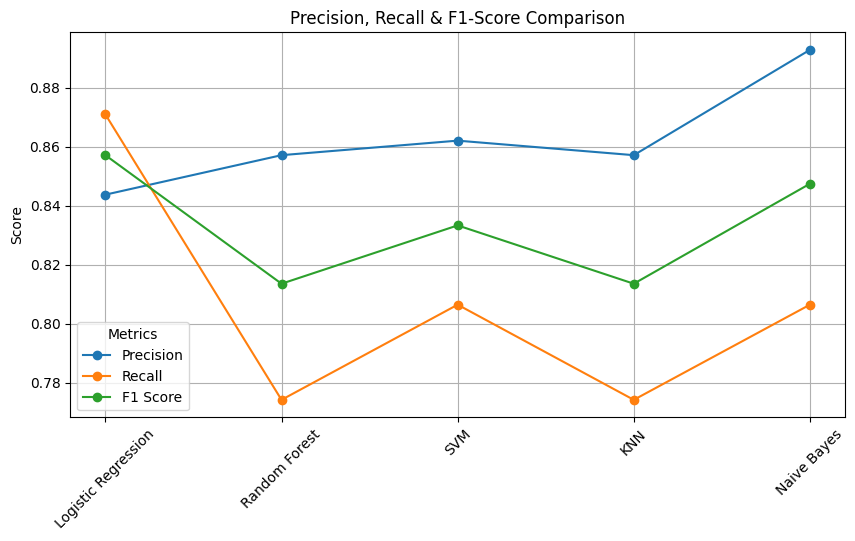

In [27]:
metric_df = pd.DataFrame(metrics).T[["Precision", "Recall", "F1 Score"]]


plt.figure(figsize=(10, 5))
metric_df.plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Precision, Recall & F1-Score Comparison")
plt.ylabel("Score")
plt.xticks(range(len(metric_df.index)), metric_df.index, rotation=45)
plt.legend(title="Metrics")
plt.grid()
plt.show()

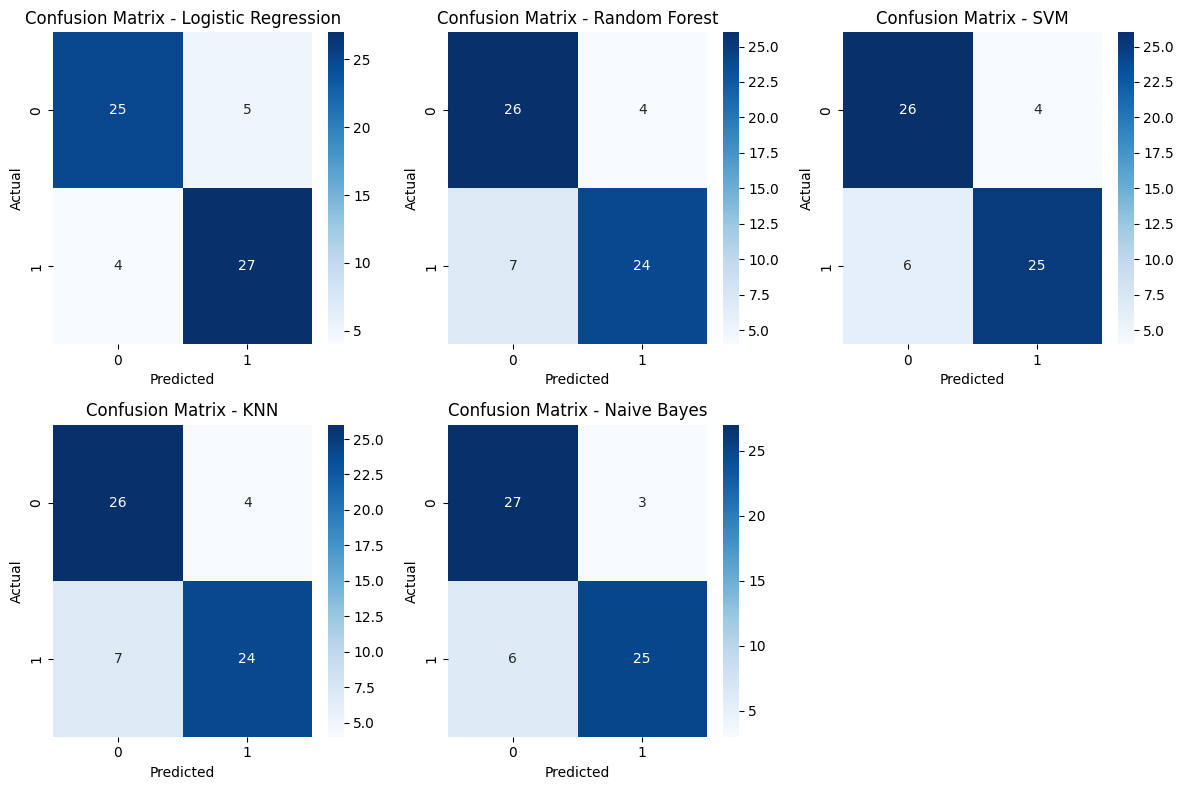

In [28]:
plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(model["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()